# Optimization Coursework

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm, mannwhitneyu


# Defining the independent counter variables
counter_f = 0;
counter_g1 = 0;
counter_g2 = 0;
counter_g3 = 0;
counter_g4 = 0;
counter_g5 = 0;
counter_g6 = 0;
counter_g7 = 0;

# Objective function f(x)
def f(x):
  global counter_f;
  counter_f +=1;
  return (P_0(x)*x[0]/0.7)+E_f(x)

# Constraint function g1(x)
def g1(x):
  global counter_g1;
  counter_g1 +=1;
  return 101000 - W(x)

# Constraint function g2(x)
def g2(x):
  global counter_g2;
  counter_g2 +=1;
  return P_0(x) - 1000

# Constraint function g3(x)
def g3(x):
  global counter_g3;
  counter_g3+=1;
  return T(x)-50;

# Constraint function g4(x)
def g4(x):
  global counter_g4;
  counter_g4+=1;
  return 0.001 - h(x)

# Constraint function g5(x)
def g5(x):
  global counter_g5;
  counter_g5+=1;
  return x[1]-x[2]

# Constraint function g6(x)
def g6(x):
  global counter_g6;
  counter_g6+=1;
  return ((0.0307*x[0])/(772.8*np.pi*P_0(x)*h(x)*x[2]))-0.001;

# Constraint function g7(x)
def g7(x):
  global counter_g7;
  counter_g7+=1;
  return (W(x)/(np.pi*(x[2]**2-x[1]**2)))-5000

#Parameters
def W(x):
  return (np.pi*P_0(x)/2)*((x[2]**2-x[1]**2)/np.log(x[2]/x[1]))

def P_0(x):
  return ((6*10**(-6)*x[3]*x[0])/(np.pi*h(x)**3))*np.log(x[2]/x[1])

def E_f(x):
  return 143.308*T(x)*x[0]

def T(x):
  return 2*(10**P(x)-560)

def P(x):
  P=(np.log10(np.log10(8.122*x[3]+0.8))-10.04)/-3.55;
  return P

def h(x):
  return (1500*np.pi/60)**2*((2*10**-6*np.pi*x[3])/E_f(x))*((x[2]**4/4)-(x[1]**4/4));


#validation code
x = np.array([4.19, 11.57, 6.69, 10.65])
print("Objective function output, f(x) = ",f(x))
print("Constraint function output, g1(x) = ",g1(x))
print("Constraint function output, g2(x) = ",g2(x))
print("Constraint function output, g3(x) = ",g3(x))
print("Constraint function output, g4(x) = ",g4(x))
print("Constraint function output, g5(x) = ",g5(x))
print("Constraint function output, g6(x) = ",g6(x))
print("Constraint function output, g7(x) = ",g7(x))


Objective function output, f(x) =  -1784.0773507231927
Constraint function output, g1(x) =  101000.01528759542
Constraint function output, g2(x) =  -1000.0000598304209
Constraint function output, g3(x) =  -52.97118117373543
Constraint function output, g4(x) =  -0.9196377239881502
Constraint function output, g5(x) =  4.88
Constraint function output, g6(x) =  -0.14477999681964232
Constraint function output, g7(x) =  -4999.999945390436


In [112]:
#define death penalty function
def phi_death(x, f, g1, g2, g3,
              g4, g5, g6, g7,
              inf=20000000):
    if (g1(x) <= 0 and g2(x) <=0
        and g3(x) <=0 and g4(x) <=0
        and g5(x) <=0 and g6(x) <=0
        and g7(x) <=0):
        return f(x)
    else:
        return inf

In [113]:
#define Random Search Function
def random_search(f, max_iteration, lower_bound,
                  upper_bound, fargs=()):
    samples_to_evaluate = np.random.uniform(low=lower_bound,
                                         high=upper_bound,
                                         size=(max_iteration, len(lower_bound)))
    results = np.array([f(x, *fargs)
                        for x in samples_to_evaluate])
    best_index = np.argmin(results)
    return samples_to_evaluate[best_index], results[best_index]

In [114]:
#define Simulated Annealing Function

# Calculate standard deviations for each dimension
def sigma_vect(lower_bound, upper_bound):
    n_dimensions = len(lower_bound)
    sigma = [(upper_bound[i] - lower_bound[i]) * 0.1 for i in range(n_dimensions)]
    return sigma

# sampling from a Truncated Normal distribution
def tnorm_rvs(mean_vect, sigma_vect, lower, upper, size=1):
    a, b = (lower - mean_vect)/sigma_vect, (upper - mean_vect)/sigma_vect
    samples = np.zeros(shape=(size, len(mean_vect)))
    for i in range(len(mean_vect)):
        samples[:,i] = truncnorm.rvs(a[i], b[i], loc=mean_vect[i],scale=sigma_vect[i], size=size)
    return samples.reshape(-1)

def simulated_annealing(f, initial_temperature, num_iterations, lower_bound, upper_bound, fargs=()):

    x_c = np.random.uniform(low=lower_bound,high=upper_bound,size=(len(lower_bound)));
    y_c = f(x_c, *fargs)
    x_best = x_c
    y_best = y_c
    t = initial_temperature

    for i in range(num_iterations):

        # Generate a new solution
        x_new = tnorm_rvs(x_c,sigma_vect(lower_bound, upper_bound),lower_bound,upper_bound)
        y_new = f(x_new, *fargs)

        delta_y = y_new - y_c
        if (delta_y <= 0) or np.random.rand() < min(np.exp(-delta_y / t),1):
            x_c = x_new
            y_c = y_new

        if  (y_new < y_best):
            x_best = x_new
            y_best = y_new

        # Cooling schedule
        t = initial_temperature/(i+1);
    return x_best, y_best

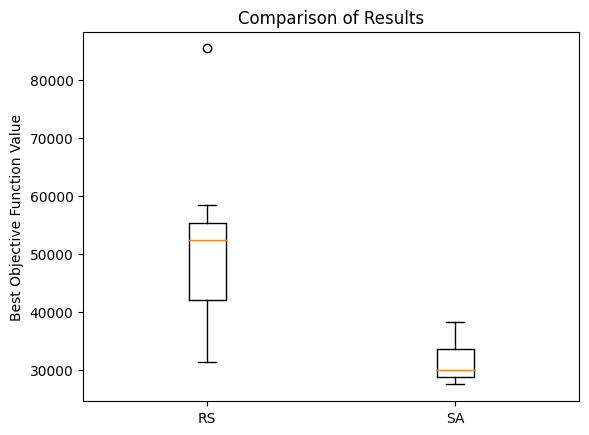

In [115]:
# define hyper-paramters
initial_temperature = 100;
number_of_samples = 10000
lower_bound = np.array([1,1,1,1])
upper_bound = np.array([16,16,16,16])
n_repeats = 21
np.random.seed(18)

# run random search and pick the best value
RS_results = [random_search(phi_death, number_of_samples,
                  lower_bound, upper_bound,
                  fargs=(f, g1, g2, g3, g4,
                         g5, g6, g7))
            for i in range(n_repeats)]

#run simulated annealing and pick the best value
SA_results = [simulated_annealing(phi_death,initial_temperature,
                  number_of_samples,lower_bound,
                  upper_bound, fargs=(f, g1, g2, g3, g4, g5,
                                      g6, g7))
            for i in range(n_repeats)]

RS_f_values = [row[1] for row in RS_results]
SA_f_values = [row[1] for row in SA_results]

plt.boxplot([RS_f_values,SA_f_values])
plt.title("Comparison of Results")
plt.xticks([1,2],['RS','SA'])
plt.ylabel("Best Objective Function Value")
plt.show()

In [119]:
# Statistical comparison of final results

random_search_mean = np.mean(RS_f_values)
simulated_annealing_mean = np.mean(SA_f_values)

print(f"Random Search mean: {random_search_mean}")
print(f"Simulated Annealing mean: {simulated_annealing_mean}")

alpha = 0.05  # Significance level

statistic, p_value = mannwhitneyu(SA_f_values,RS_f_values, alternative="less")
print(f"Statistic = {statistic}, P_Value = {p_value}")


Random Search mean: 50000.96081618428
Simulated Annealing mean: 31310.56018023197
Statistic = 16.0, P_Value = 1.4351429481047718e-07


# Comments on Significance

Based on the above analysis and results, we can conclude the following:

1. The objective function mean value for Random Search is significantly higher **(50,000.96)** compared to Simulated Annealing **(31,310.56)**. This means that, on average, Simulated Annealing is providing better solutions with considerably lower objective function values than Random Search.
2.  The Mann-Whitney U test resulted in a statistic of 16.0 with an incredibly low p-value **(~1.44*10^(-7))**. Considering this very small p-value, we can reject the null hypothesis which states that there is no difference between the performance of Random Search and Simulated Annealing.
3. Finally, we can conclude that Simulated Annealing seems to be a more effective optimization algorithm than Random Search.

